![Alt text](https://gistcdn.githack.com/Gbecdox/ff5c3452d2941bc856a4594b17b63b09/raw/8487b04f1cb234eaba6b0fcb256f5cd280f62b94/HeaderMAT.svg)

Nesse notebook veremos sobre:

* **Gráfico de Linha**
* **Customização de Gráficos**
 * Título
 * Legendas
 * Grade
 * Tamanho de figuras
 * Ticks
 * Textos/Marcações
 * Cores
* **União de Curvas e Gráficos**
* **Gráfico de Dispersão**
* **Gráfico de Setores** (*pizza*)
* **Gráfico de Barras**
* **Histogramas**
* **Diagrama de Caixa** (*boxplot*)

# Introdução

## Importando e entendendo o funcionamento

Quando estamos em um notebook, como esse, é usual (e recomendado) não só importar a biblioteca, mas também adicinar a linha `%matplotlib inline`. Isto é:

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Mas por que fazer isso? Antes de tudo, é importe saber que funções iniciadas por `%` ou `%%` pertecem a uma categoria especial dentro do IPython, são as chamadas **funções mágicas** — não confundir com os *métodos mágicos* ou *dunders* nativos do Python (como `__int__`). Simplificadamente, essas são funções que permitem controlar a forma como o IPython opera, caso tenha interesse em saber mais, experimente o comando `%magic`.

Agora que já sabemos disso, utilizar `%matplotlib inline` faz com que os gráficos que iremos plotar apareçam no próprio notebook, logo abaixo da célula na qual o código foi escrito e não em uma nova janela, por exemplo.

# Construindo Gráficos

## Gráficos de Linha

Começaremos com um modelo simples: um gráfico de linha. Para isso, usaremos `plt.plot()` para construir a curva e `plt.show()` para exibi-la.

In [37]:
x = [1, 2, 3, 4, 5]
y = [2, 1, 3, 2, 6]

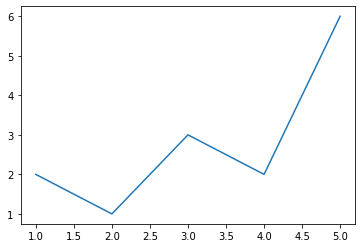

In [38]:
plt.plot(x, y) # Cria o gráfico y versus x
plt.show()     # Exibe o gráfico criado

Note que passamos como argumentos para `plt.plot()` duas listas (**x** e **y**) que contêm as coordenadas, nos respectivos eixos, dos pontos que queremos exibir. Na verdade, qualquer estrutura de dados que seja considerada um `array_like` pode ser utilizada, desde que as dimensões de **x** e **y** sejam iguais.

Além do que já citamos, usar `%matplotlib` nos traz outra vantagem: o comando `plt.show()` passa a ser dispensável, isto é, os gráficos sempre são exibidos após a célula, quer ela contenha o comando `plt.show()`, quer não.

## Incrementando a visualização: título, legendas, grade e tamanho da figura

Podemos recorrer a paramêtros e funções auxiliares que tornem a leitura do gráfico mais clara ou que elucidem pontos importantes.

Começaremos inserindo informações pertinentes a todo gráfico:

* `plt.title()` insere um título na figura;
* `plt.xlabel()` insere a legenda para o eixo horizontal;
* `plt.ylabel()` insere a legenda para o eixo vertical.

Text(0, 0.5, 'Ordenadas')

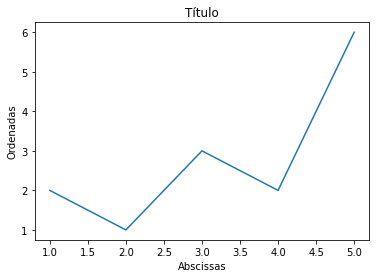

In [39]:
plt.plot(x, y)

plt.title("Título")     # Título do gráfico
plt.xlabel("Abscissas") # Legenda do eixo x
plt.ylabel("Ordenadas") # Legenda do eixo y

Quando temos muitos dados a visualização dos pontos pode ficar prejudicada, para resolver isso, podemos inserir uma grade de fundo com `plt.grid()` e alterar o tamanho da figura através de `plt.figure()`.

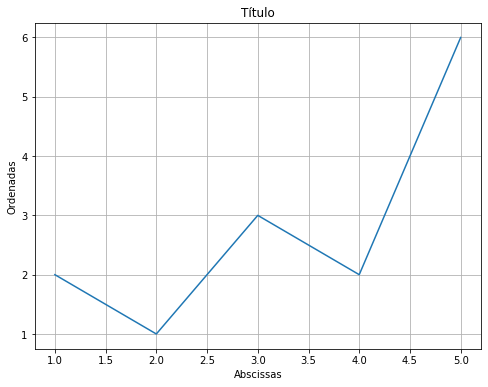

In [40]:
plt.figure(figsize=(8,6)) # Altera o tamanho da figura; default: (6.4, 4.8)

plt.plot(x, y)

plt.title("Título")
plt.xlabel("Abscissas")
plt.ylabel("Ordenadas")

plt.grid() # Adiciona uma grade ao fundo do gráfico

Perceba que quando utilizamos a função `plt.figure()` é necessário um cuidado especial com a ordem na qual as linhas do código estão dispotas, para garantir que essa esteja **antes** das demais. Isso porque para cada gráfico é gerada automaticamente uma figura e o comando `plt.figure()` força a criação de uma nova, que contém as informações dos parâmetros passados e das **linhas abaixo** da sua, parando ao encontrar o final da célula ou um outro `plt.figure()`. Para checar os demais parâmetros da função é uma boa prática visitar a [documentação](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).

## Incrementando a visualização: ticks, texto e marcações

Você notou que em nenhum momento definimos o intervalo de valores para cada eixo? Isso porque a função `plt.plot()` já o faz automaticamente, mas utilizando `plt.xticks()` e `plt.yticks()` passa a ser nós que determinamos.

([<matplotlib.axis.YTick at 0x15fb467fe08>,
 <a list of 7 Text yticklabel objects>)

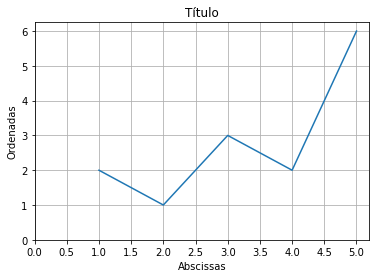

In [41]:
plt.plot(x, y)

plt.title("Título")
plt.xlabel("Abscissas")
plt.ylabel("Ordenadas")

plt.grid()

plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]) # Valores exibidos no eixo x
plt.yticks([0, 1, 2, 3, 4, 5, 6])                       # Valores exibidos no eixo y

Uma forma muito conveniente para determinar o intervalo dos eixos é com auxílio da biblioteca NumPy, podemos obter esse mesmo resultado anterior fazendo:

```python
import numpy as np

plt.xticks(np.arange(0, 5.5, 0.5))
plt.yticks(np.arange(0, 7, 1))
```

Além disso, através das funções `plt.text()` e `plt.annotate()` conseguimos inserir informações complementares diretamente nos gráficos. Primeiro, vamos nos preocupar em exbir um texto numa região da figura e, para facilitar a leitura, colocaremos um fundo colorido. Inicialmente, podemos criar uma variável que contenha as propriedades dessa nossa caixa de texto.

In [42]:
caixa = dict(boxstyle="round", fc="green") # Propriedades da caixa de texto (arredondada e verde)

Agora basta recorrer a função `plt.text()` e ao seu argumento `bbox` para inserirmos o texto e a caixa, respectivamente.

Text(2, 5, 'Texto em caixa')

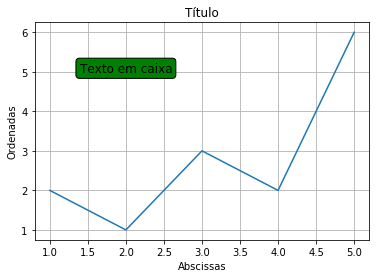

In [43]:
plt.plot(x, y)

plt.title("Título")
plt.xlabel("Abscissas")
plt.ylabel("Ordenadas")

plt.grid()

# Insere o texto centralizado nas coordenadas (1,5) e com tamanho de fonte 12
plt.text(2, 5, "Texto em caixa", ha="center", fontsize=12, bbox=caixa)

Mas e se um ponto em específico merecer destaque? Como poderíamos marcá-lo? Com `plt.annotate()` podemos indicar pontos utilizando textos e setas. Primeiro, semelhante ao que fizemos com a caixa de texto, definimos as propriedades da nossa seta:

In [44]:
# arrowstyle: estilo da seta/marcador; connectionstyle: forma do corpo, nesse caso, curvado ("angle3")
seta = dict(arrowstyle="->", connectionstyle="angle3")

Feito isso, usamos `plt.annotate()` e seu argumento `arrowprops`:

Text(3.5, 4, 'Ponto (3,3)')

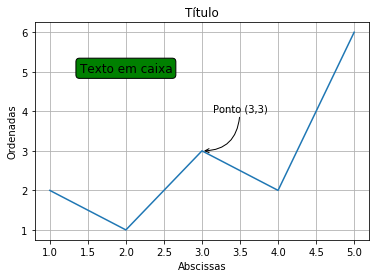

In [45]:
plt.plot(x, y)

plt.title("Título")
plt.xlabel("Abscissas")
plt.ylabel("Ordenadas")

plt.grid()

plt.text(2, 5, "Texto em caixa", ha="center", fontsize=12, bbox=caixa)

# Respectivamente, os três primeiros argumentos são: texto, coordenadas do ponto, coordenadas do texto.
plt.annotate("Ponto (3,3)", (3,3), (3.5,4), ha="center", arrowprops=seta)

O Matplotlib oferece pelo menos uma dezena de alternativas para os argumentos que mostramos nessa seção, por isso, recomendamos visitar o [tutorial de anotações](https://matplotlib.org/3.1.1/tutorials/text/annotations.html) para conferir todas elas — atente-se para as tabelas seguidas por imagens!

## União: curvas em um mesmo sistema de coordenadas

Caso precisemos expressar duas ou mais curvas em um mesmo gráfico basta usar a função `plt.plot()` repetidas vezes e, se necessário, `plt.show()`. Além disso, o uso de `plt.legend()` permite a identificação de cada curva.

In [46]:
# Coordenadas dos pontos da nova curva a ser plotada
x2 = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5] 
y2 = [5, 4, 5, 4, 4, 3, 3, 2, 2]

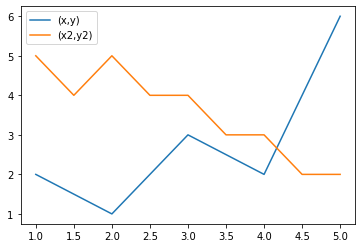

In [47]:
plt.plot(x, y)   # Cria a curva usada anteriormente (y versus x)
plt.plot(x2, y2) # Cria a nova curva (y2 versus x2)

plt.legend(("(x,y)","(x2,y2)")) # Recebe uma tupla contendo o nome desejado para a legenda, na ordem dos plots.

Perceba que se usarmos `plt.show()` entre as funções `plt.plot()` estaremos exibindo a figura criada até ali e, consequentemente, será iniciada uma nova figura para as linhas seguintes.

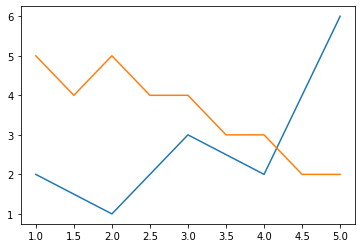

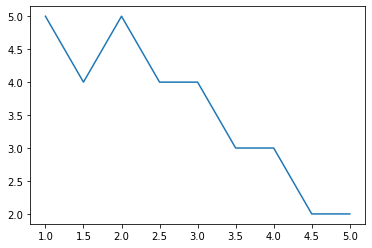

In [48]:
plt.plot(x, y)
plt.plot(x2, y2)
plt.show() # Exibe a figura criada até essa linha, NÃO encerrando a execução da célula.

plt.plot(x2,y2)

Já para facilitar a leitura, as curvas quando juntas possuem cores distintas, mesmo assim, ainda podemos fazer alterações com os argumentos:
* `color` ou `c`, para definer uma cor para a linha;
* `linewidth` ou `lw`, para definir uma espessura para a linha;
* `linestyle` ou `ls`, para definir o estilo de linha.

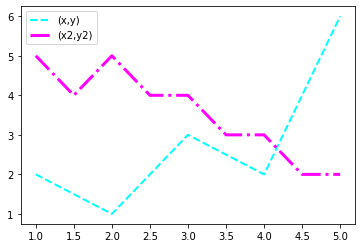

In [49]:
plt.plot(x, y, color="cyan", linewidth=2, linestyle="--") # Coloração ciano, linha tracejada
plt.plot(x2, y2, c="magenta", lw=3, ls="-.")              # Coloração magenta, linha traço e ponto

plt.legend(("(x,y)","(x2,y2)"))

Não se esqueça de verificar a [tabela de cores](https://matplotlib.org/2.0.2/_images/named_colors.png) e a [lista de estilos](https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png)!

## União: gráficos em uma mesma figura

Mas e se precisarmos exibir múltiplos gráficos em uma mesma figura? Para isso utilizamos a função `plt.subplot()`. Seu funcionamento é um pouco mais sofisticado, primeiramente, considere que queremos exibir **dois gráficos lado a lado**, então podemos passar os valores `n`, `m` e `i` tais que:

* `n`: número de linhas,
* `m`: número de colunas,
* `i`: índice;

de duas formas equivalentes:

* `plt.subplot(m, n, i)` ou
* `plt.subplot(mni)`.

Para esclarecer, pense em uma matriz com essas dimensões (**n** por **m**) na qual seus elementos possuem um índice (**i**) que começa igual a 1 no canto superior esquerdo e é crescente da esquerda para a direita, de cima para baixo. Então:

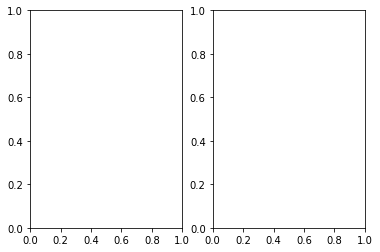

In [50]:
ax1 = plt.subplot(1, 2, 1) # Campo à esquerda (índice 1), receberá um gráfico
ax2 = plt.subplot(1, 2, 2) # Campo à direita (índice 2), receberá outro gráfico

Agora, basta entrar com os gráficos desejados através da função `ax.plot()` e usar `ax.set_title()` para definir um título.

Text(0.5, 1.0, 'Índice 2')

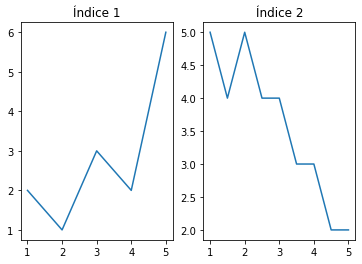

In [51]:
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.plot(x, y)             # Plota a curva y versus x
ax1.set_title("Índice 1")  # Adiciona o título

ax2.plot(x2, y2)           # Plota a curva y2 versus x2
ax2.set_title("Índice 2")  # Adiciona o título

Dessa forma, independemente da dimensão dessa "matriz" a construção será análoga, tome cuidado apenas com a sobreposição das informações: use `plt.tight_layout()` para justapor os gráficos corretamente. No exemplo abaixo, temos gráficos dispostos tais como em uma matriz 2x2:

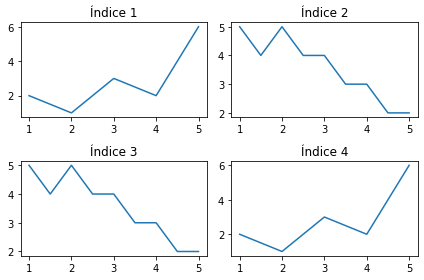

In [52]:
ax1 = plt.subplot(221) # Campo de índice 1 na "matriz" 2x2
ax2 = plt.subplot(222) # Campo de índice 2 na "matriz" 2x2
ax3 = plt.subplot(223) # Campo de índice 3 na "matriz" 2x2
ax4 = plt.subplot(224) # Campo de índice 4 na "matriz" 2x2

ax1.plot(x, y)
ax1.set_title("Índice 1")

ax2.plot(x2, y2)
ax2.set_title("Índice 2")

ax3.plot(x2, y2)
ax3.set_title("Índice 3")

ax4.plot(x, y)
ax4.set_title("Índice 4")

plt.tight_layout() # Garante o espaçamento adequado entre os gráficos (impede sobreposição).

Infelizmente, a ideia intuitiva de imaginar os gráficos dispostos em uma matriz não fica tão evidente quando queremos linhas ou colunas com diferentes números de gráficos entre si, por exemplo:

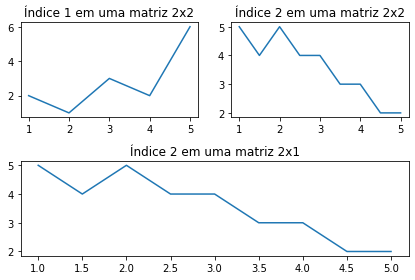

In [53]:
ax1 = plt.subplot(2, 2, 1) 
ax2 = plt.subplot(2, 2, 2)
ax5 = plt.subplot(2, 1, 2) # Índice 2 pois a primeira linha (índice 1 para uma matriz 2x1) já está ocupada

ax1.plot(x, y)
ax1.set_title("Índice 1 em uma matriz 2x2")

ax2.plot(x2, y2)
ax2.set_title("Índice 2 em uma matriz 2x2")

ax5.plot(x2, y2)
ax5.set_title("Índice 2 em uma matriz 2x1")

plt.tight_layout() # Garante o espaçamento adequado entre os gráficos (evita sobreposição)

## Gráficos de dispersão

Os gráficos de dispersão (ou *scatter plots*, em inglês) são úteis quanto buscamos verificar como dois dados se relacionam, isto é, quanto um dado afeta o outro. Vamos usar a função `plt.scatter()` e criar duas listas com valores fictícios para dar um exemplo:
* seja **i** a idade (em meses) de bebês;
* seja **h** a altura (em centímetros) dos bebês.

In [54]:
i = [1, 1.3, 1.7, 2.2, 2.5, 3, 3.2, 3.1, 3.3, 3.7, 4, 4.2, 4.4, 5, 5.6, 5.2, 5.3, 6, 6, 6, 6] # Idades
h = [52, 50, 51, 56, 55, 59, 57, 55, 56, 61, 65, 62, 63, 61, 60, 66, 63, 64, 60, 68, 69]      # Alturas

Text(0, 0.5, 'Altura (cm)')

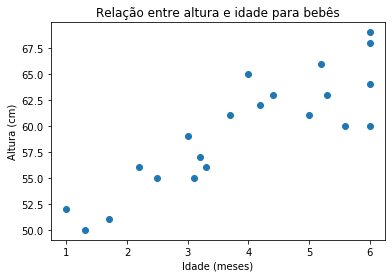

In [55]:
plt.scatter(i, h) # Cria o gráfico de dispersão (altura por idade)

plt.title("Relação entre altura e idade para bebês") # Título do gráfico
plt.xlabel("Idade (meses)")                          # Legenda do eixo x
plt.ylabel("Altura (cm)")                            # Legenda do eixo y

Perceba que, diversas vezes, muitas funções e argumentos que já vimos aplicam-se a qualquer gráfico, todavia, no caso de um *scatter plot*, é interessante ressaltar que:
* `c` define a cor, contudo, pode ser passado um `array_like` (e.g. uma lista) de dimensão igual a dos dados plotados para mapear cores;
* `s` é um `array_like` usado para alterar o tamanho dos marcadores;
* `marker` define o marcador a ser utilizado, confira [aqui](https://matplotlib.org/3.1.1/api/markers_api.html) a lista de marcadores.

Text(0, 0.5, 'Altura (cm)')

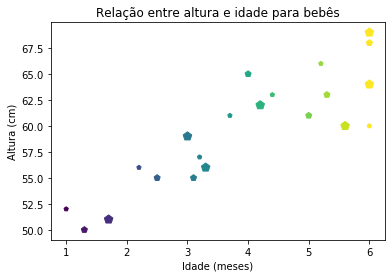

In [56]:
tamanho = [20, 40, 80] # Três possíveis tamanhos para o marcador

plt.scatter(i, h, c=i, s=tamanho, marker="p")

plt.title("Relação entre altura e idade para bebês") # Título do gráfico
plt.xlabel("Idade (meses)")                          # Legenda do eixo x
plt.ylabel("Altura (cm)")                            # Legenda do eixo y

## Gráficos de setores

Para criar gráficos de setores, também chamados de gráficos de pizza ou *pie charts*, usaremos `plt.pie()`. Para exemplificar, vamos definir um dicionário que possui quatro modelos de carros como *keys* (`"A"`, `"B"`, `"C"` e `"D"`) e seus respectivos números de vendas (em um dado período, por exemplo, **setembro**) como *values*.

In [57]:
carros = {
    "A":7500,
    "B":10000,
    "C":3200,
    "D":2010
}

Agora, além de indicar quais dados queremos plotar (i.e., o número de vendas), é importante que passemos os argumentos:
* `labels`: a legenda de cada setor;
* `autopct`: o valor numérico a ser exibido em cada setor.

([<matplotlib.patches.Wedge at 0x15fb2a34d08>,
 [Text(0.5591988451498489, 0.9472574368053678, 'A'),
  Text(-1.0452651569607554, -0.3426671149144718, 'B'),
  Text(0.595461042065891, -0.9248925058523305, 'C'),
  Text(1.0577505872352349, -0.3019332628305733, 'D')],
 [Text(0.3050175518999175, 0.5166858746211097, '33.03%'),
  Text(-0.5701446310695029, -0.1869093354078937, '44.03%'),
  Text(0.3247969320359405, -0.5044868213739985, '14.09%'),
  Text(0.5769548657646735, -0.16469087063485816, '8.85%')])

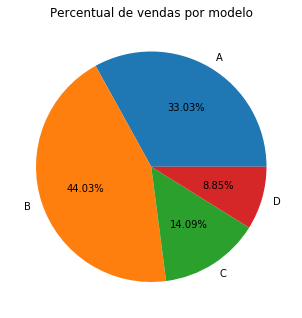

In [58]:
plt.figure(figsize=(7,5.3))                  # Altera o tamanho da figura
plt.title("Percentual de vendas por modelo") # Título do gráfico

plt.pie(carros.values(), labels=carros.keys(), autopct='%1.2f%%')

**Obs:** a *string* `'%1.2f%%'` obedece a uma sintaxe mais antiga do Python, basicamente:
* `1` é o número mínimo de dígitos esperado para a *string*;
* `.2f` exibe o número até a sua segunda casa decimal;
* `%%` exibe o símbolo **%**.

Lembre-se que você pode conhecer mais sobre outros argumentos através da [documentação](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html).

## Gráficos de barras

Uma forma alternativa de visualizarmos os dados anteriores é através de um gráfico de barras, fazemos isso através de `plt.bar()` e de modo análogo ao gráfico de setores, veja:

<BarContainer object of 4 artists>

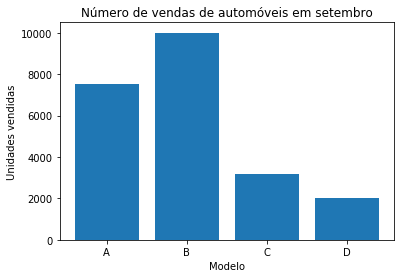

In [59]:
plt.title("Número de vendas de automóveis em setembro") # Título do gráfico
plt.xlabel("Modelo")                                    # Legenda do eixo x
plt.ylabel("Unidades vendidas")                         # Legenda do eixo y

plt.bar(carros.keys(), carros.values())

Uma alternativa para permitir construções mais sofisticadas consiste em utilizar valores numéricos para o **eixo x** e, posteriormente, substitui-los por uma legenda. Imagine que precisamos representar as vendas dos modelos em dois períodos diferentes: em **setembro** e em **outubro**, por exemplo. Vamos primeiro definir um novo dicionário com os dados de outubro:

In [60]:
carros2 = {
    "A":8800,
    "B":7930,
    "C":3000,
    "D":3020
}

Seria interesssante então exibir os dois períodos juntos (i.e., em um mesmo gráfico) para facilitar comparações. Para isso, especificaremos as posições de cada barra e suas espessuras através do argumento `width` (para evitar sobreposições). Façamos isso com os dados de setembro.

<BarContainer object of 4 artists>

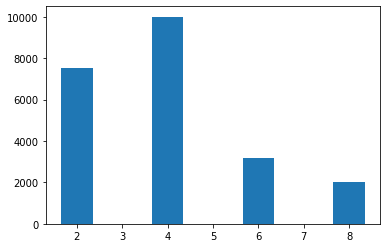

In [61]:
plt.bar([2, 4, 6, 8], carros.values(), width=0.7) # Exibe as barras nas coordenas passadas e com 0.7 de espessura

Repetimos esse processo com os dados de outubro, mas considerando que as coordenadas do novo gráfico devem levar em conta a espessura das barras já plotadas:

<BarContainer object of 4 artists>

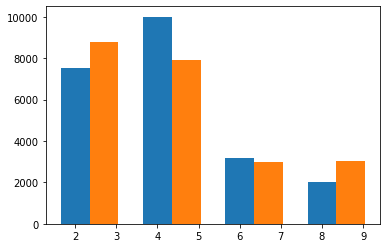

In [62]:
plt.bar([2, 4, 6, 8], carros.values(), width=0.7)
plt.bar([2.7, 4.7, 6.7, 8.7], carros2.values(), width=0.7) # coordenadas outubro = coordenadas setembro + width

Pronto, só precisamos dos ajustes finais:

* `align`: altera o alinhamento entre as barras e os valores do **eixo x** — alteramos os dos dois gráficos de `"center"` (*default*) para `"edge"`, assim a legenda ficará entre ambas as barras.
* `tick_label`: legenda que irá sobrepor os valores numéricos do **eixo x**.

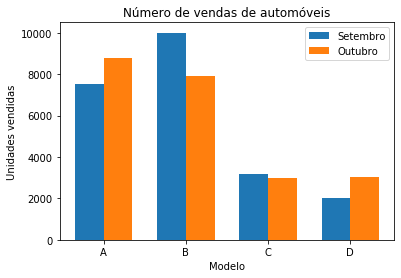

In [63]:
leg = list(carros.keys()) # Cria uma lista dos modelos, será utilizada no lugar dos números do eixo x

plt.bar([2, 4, 6, 8], carros.values(), width=0.7, align="edge")
plt.bar([2.7, 4.7, 6.7, 8.7], carros2.values(), width=0.7, tick_label=leg, align="edge")

plt.title("Número de vendas de automóveis") # Título do gráfico
plt.xlabel("Modelo")                        # Legenda do eixo x
plt.ylabel("Unidades vendidas")             # Legenda do eixo y
plt.legend(("Setembro","Outubro"))          # Identificação de cada período

Caso prefira, `plt.barh()` nos permite exibir essas mesmas informações, contudo, utilizando barras horizontais. Temos que tomar cuidado, entretanto, com os argumentos. Primeiro, passamos a legenda (uma lista dos modelos de carros, no nosso caso) e depois `width`, que passa a ser o valor correspondente a cada coluna (uma lista com o número de unidades vendidas por modelo, no nosso caso).

<BarContainer object of 4 artists>

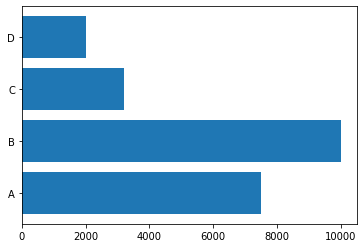

In [64]:
plt.barh(leg, width=list(carros.values())) # leg = list(carros.keys()); a lista dos modelos usada a cima

## Histogramas

Distribuições de frequências relativas, os histogramas podem ser construídos através da função `plt.hist()`. Para demonstrar seu funcionamento, imaginemos as notas de prova de uma turma.

In [65]:
notas = [0, 1, 1.2, 1.5, 2, 2.6, 2.7, 3, 3.1, 3.2, 3.3, 4, 4.4, 4.5, 5, 5.3, 6.1, 7, 7.1, 9.2]

(array([1., 3., 3., 4., 3., 2., 1., 2., 0., 1.]),
 array([0.  , 0.92, 1.84, 2.76, 3.68, 4.6 , 5.52, 6.44, 7.36, 8.28, 9.2 ]),
 <a list of 10 Patch objects>)

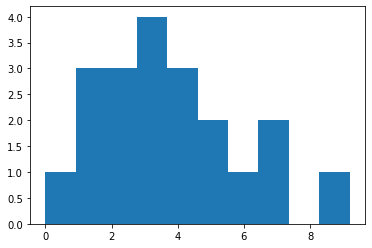

In [66]:
plt.hist(notas)

Um parâmetro de fundamental importância, `bins`, é usado para controlar o número de colunas do histograma. Note que não há um valor ideal pré-determinado, dependendo então de quais são os dados e da quantidade desses. Nesse exemplo, aumentando de 10 (*default*) para 13, pudemos notar a presença de um vale ao redor do valor 4 e de um pico no entorno de 5.

(array([1., 2., 2., 2., 4., 1., 2., 2., 1., 1., 1., 0., 1.]),
 array([0.        , 0.70769231, 1.41538462, 2.12307692, 2.83076923,
        3.53846154, 4.24615385, 4.95384615, 5.66153846, 6.36923077,
        7.07692308, 7.78461538, 8.49230769, 9.2       ]),
 <a list of 13 Patch objects>)

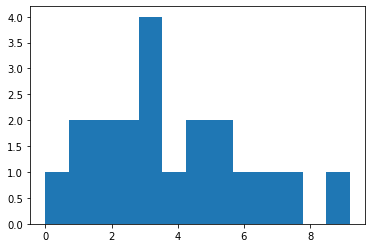

In [67]:
plt.hist(notas, bins=13)

## Diagrama de caixa

Trata-se de um método prático e muito eficiente de exibição e leitura dos dados. No diagrama são representados os limites superior e inferior da amostra — respectivamente, o maior e o menor valor (desconsiderando os *outliers*); os três **quartis** e os **outliers**. Antes de continuarmos, é importante conhecer os termos citados.

### Quartis

Simplificadamente, são valores que dividem uma dada amostra em pontos específicos. São três ao todo, a saber:
* **Segundo Quartil:** a mediana, separa a "metade menor" da "metade maior" de uma amostra.
* **Primeiro Quartil:** divide a "metade menor" ao meio.
* **Terceiro Quartil:** divide a "metade maior" ao meio.

Se considerarmos a sequência (1, 2, 3, 4, 5, 6, 7, 8, 9, 10) saberemos os quartis determinando:
* o valor central da amostra (mediana), que é equidistante ao 1 (primeiro termo) e ao 10 (último termo), portanto, **5.5** (média aritmética entre 5 e 6);
* o valor central entre 1 (primeiro termo) e 5.5 (mediana), portanto, **3**;
* o valor central entre 5.5 (mediana) e 10 (último termo), portanto, **8**.

**Obs:** o método a cima é uma alternativa prática para a determinação dos quartis. Contudo, ao longo dos anos foram criados [diferentes métodos](https://i.ibb.co/W2pTMCM/Untitled.png) que, inclusive, não necessariamente resultam em valores iguais. Para um grande volume de dados a diferença é irrisória, mas talvez seja importante se preocupar com ela para pequenos *datasets*.

### *Outliers*

Trata-se de uma observação que se diferencia drasticamente das demais, são "pontos fora da curva", informações inconsistentes ou discrepantes. Geralmente eles dificultam e prejudicam a criação de modelos, mas isso nem sempre. Por exemplo, uma medição de 37°C é um *outlier* que prejudicaria o desempenho de um modelo destinado a prever temperaturas em uma cidade que registra máximas de até 24°C. Por outro lado, a busca por atletas olímpicos ou de altíssimo desempenho pode ser encarada como, na verdade, uma procura por *outliers*.

### Boxplot

Finalmente, vamos usar a função `plt.boxplot()` para criar um diagrama com as notas da turma da seção anterior.

{'whiskers': [<matplotlib.lines.Line2D at 0x15fb5d785c8>,
 'caps': [<matplotlib.lines.Line2D at 0x15fb5d78f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x15fb5d72bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x15fb5d7ce88>],
 'fliers': [<matplotlib.lines.Line2D at 0x15fb5d80c48>],
 'means': []}

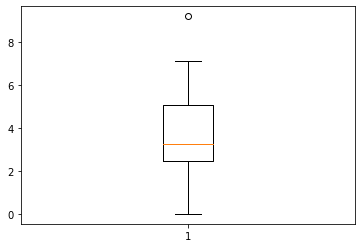

In [68]:
plt.boxplot(notas)

Embora possa parecer não muito convencional, a leitura do diagrama é simples, na imagem abaixo temos uma legenda.

<img style="float: left;" src=https://i.ibb.co/9VPdq2G/Picture1.png, width=410, height=537>

**Obs:** os demarcadores que partem da caixa até cada um dos limites são chamados *whiskers*.

Mas não se esqueça que é sempre possível customizar os plots, para isso, usaremos:

* `patch_artist`: habilita (quando `True`) ou desabilita (quando `False`, *default*) o  preenchimento da caixa com uma cor;
* `boxprops`: propriedades da caixa;
* `medianprops`: propriedades da mediana;
* `whiskerprops`: propriedades dos *whiskers*;
* `capprops`: propriedades dos demacadores dos limites;
* `flierprops`: propriedades dos marcadores de *outliers*.

Mas antes de passar os argumentos para a função, definiremos suas propriedades.

In [69]:
box = dict(linewidth=0, facecolor="dodgerblue")                         # Sem contorno e azul
mediana = dict(linewidth=2, color="red")                                # Linha espessa em vermelho
whisker = limites = dict(linewidth=2.5)                                 # Linhas espessas
outliers = dict(marker="o", markerfacecolor="darkorange", markersize=8) # Círcular, laranja e com tamanho 8

Agora, basta plotar e, nesse caso, aplicar alguns ajustes para enriquecer a leitura.

{'whiskers': [<matplotlib.lines.Line2D at 0x15fb5dee588>,
 'caps': [<matplotlib.lines.Line2D at 0x15fb5deefc8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x15fb5dee188>],
 'medians': [<matplotlib.lines.Line2D at 0x15fb5de35c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15fb5de0bc8>],
 'means': []}

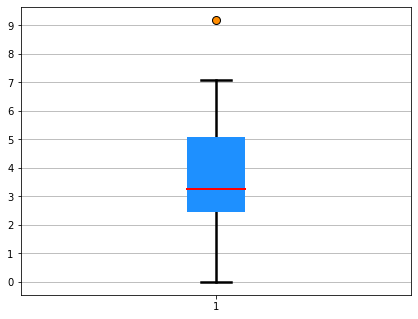

In [70]:
plt.figure(figsize=(7,5.3))                    # Altera o tamanho da figura
plt.grid(axis="y")                             # Exibe a grade somente para o eixo y
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Valores exibidos no eixo y

plt.boxplot(notas, patch_artist=True, boxprops=box, medianprops=mediana, whiskerprops=whisker, capprops=limites, flierprops=outliers)

***

![Alt text](https://gistcdn.githack.com/Gbecdox/178a8d0cd024d5e52d63e3c11a2cdfd7/raw/3f32b8a31509ec3b2b20ebb202113b2da0e9c751/FooterGM.svg)
***